# Data Visualization Techniques

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

In [2]:
#read the dataset
df = pd.read_csv('dataset_covid/age_data.csv')

### Vertical Bar Chart

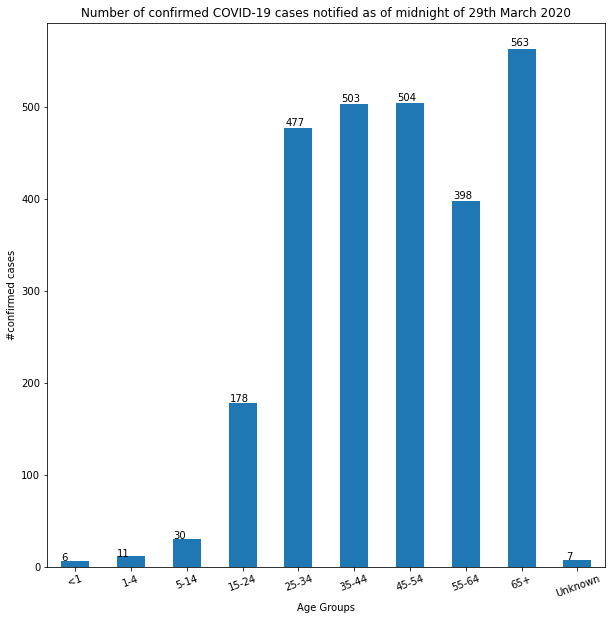

In [3]:
ax = df.plot(kind='bar',figsize=(10, 10),ylabel='Count', legend=False)
plt.title('Number of confirmed COVID-19 cases notified as of midnight of 29th March 2020')
plt.xlabel('Age Groups')
plt.ylabel('#confirmed cases')
plt.xticks([0,1,2,3,4,5,6,7,8, 9],['<1', '1-4', '5-14','15-24','25-34','35-44','45-54','55-64','65+','Unknown'], rotation=20)

# df.plot(False)
# # Annotating the bar plot with the values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Horizontal Bar Chart 

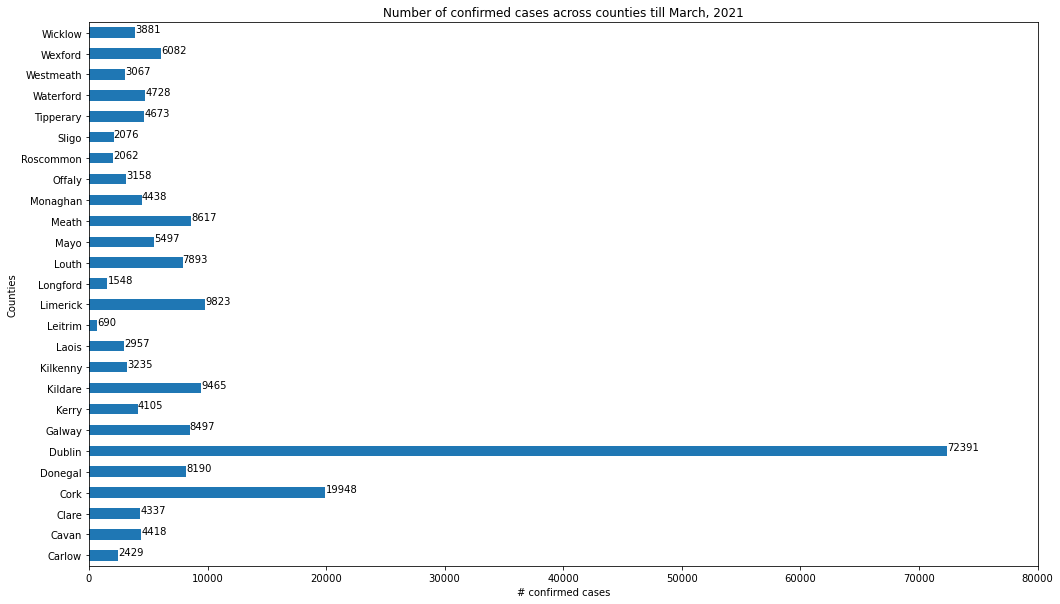

In [4]:
#read the data
df = pd.read_csv('dataset_covid/Covid19CountyStatisticsHPSCIreland.csv')
df.head()

# extract month and year from the dataset
df['month'] = pd.DatetimeIndex(df['TimeStamp']).month
df['year'] = pd.DatetimeIndex(df['TimeStamp']).year

# get only the data for March 2021
df1 = df[(df.month == 3 )]
df1 = df[(df.year == 2021 )]

# extract the columns to plot
x=df1[['CountyName','month','ConfirmedCovidCases']]

# group the data according to counties as well as number of confirmed cases
x = x.groupby('CountyName')['ConfirmedCovidCases'].mean()

# # plot the horizontal bar graph
ax = x.plot(kind='barh',figsize=(17, 10),ylabel="Count")
plt.title('Number of confirmed cases across counties till March, 2021')
plt.xlabel('# confirmed cases')
plt.ylabel('Counties')
plt.xlim(0,80000)
# Annotating the bar plot with the values
for p in ax.patches:
    width = p.get_width()
    plt.text(9+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width))

## Stacked-Bar Graph

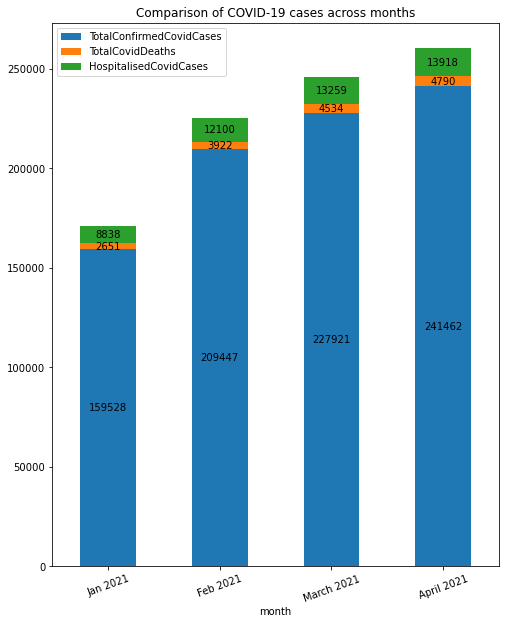

In [20]:
df = pd.read_csv('dataset_covid/CovidStatisticsProfileHPSCIrelandOpenData.csv')
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

#get data for 2021
df = df[(df.year == 2021 )]
month = df['month']
df = df[['TotalConfirmedCovidCases','TotalCovidDeaths','HospitalisedCovidCases', 'month']]
counter = a1.groupby('month').mean()
ax = counter.plot(kind='bar', stacked=True, figsize=(8, 10))
# ax = plt.bar(month, a1, label='confirmed cases')
# ax  = plt.bar(month, a2, label='covid deaths')
# ax = plt.bar(month, a3,label='hospitalised covid cases', bottom=a2)
# plt.xlabel('Months')
# plt.ylabel('#cases')
positions = (0,1,2,3)
labels = ('Jan 2021','Feb 2021','March 2021','April 2021')
plt.xticks(positions, labels, rotation=20)
plt.title('Comparison of COVID-19 cases across months')
plt.legend()

# ax = a1.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')